# Astrostatistics & Data Mining-HW3
## Ruan Hsuan Wei 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as stats
from astroML import stats as stats2
from astroML.resample import jackknife,bootstrap
from statsmodels.stats.diagnostic import lillifors
import math
%matplotlib inline

In [2]:
# cat asteroid_dens.dat

In [3]:
data = np.genfromtxt('asteroid_dens.dat',dtype=None,skip_header=1)
name = [data[i][1] for i in range(len(data))]
err = [data[i][3] for i in range(len(data))]
dens=[data[i][2] for i in range(len(data))]

### a)

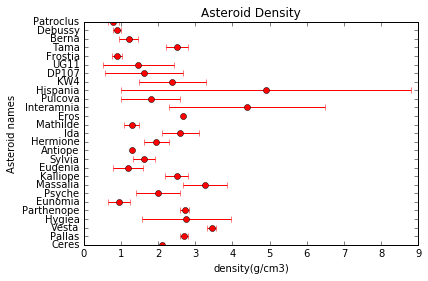

In [4]:
plt.yticks(np.arange(len(data)),name)
plt.errorbar(dens, np.arange(len(data)), xerr=err,fmt='ro')
plt.title("Asteroid Density")
plt.xlabel("density(g/cm3)")
plt.ylabel("Asteroid names")
plt.show()

### b & d )
Box and whisker plot shows the minimum,first quartile, median, third quartile, and maximum of the measurement. Outliners will be plotted individually. From the plot, we can see that the data is mostly normally distributed in the middle, and it has some outliners with bigger values.

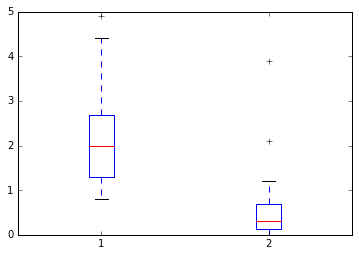

In [5]:
data=[dens,err]
plt.boxplot(data)
plt.show()

### e) 
We can see that the middle part mostly fits the line, but the points at the two edges are not on the line.

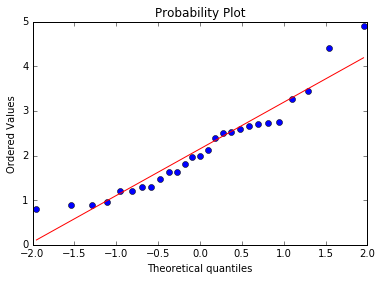

In [6]:
res = stats.probplot(dens, plot=plt)
plt.show()

### f)

In [7]:
# ks=stats.kstest(dens, 'norm')
anderson,crit,sig=stats.anderson(dens,'norm')
shapiro,shap_p=stats.shapiro(dens)
lil,lil_p=lillifors(dens)
# print ks
print "Anderson statistic:",anderson,", critical values:",crit,", significance level:",sig
print "Shapiro statistic:",shapiro,", shapiro p-value:",shap_p
print "lilliefors statistic:",lil,", lilliefors p-value:",lil_p


Anderson statistic: 0.549106097739 , critical values: [ 0.517  0.589  0.707  0.824  0.98 ] , significance level: [ 15.   10.    5.    2.5   1. ]
Shapiro statistic: 0.924672186375 , shapiro p-value: 0.0512202829123
lilliefors statistic: 0.130341324655 , lilliefors p-value: 0.275468165516


### g)
From the test results above, we cannot reject the null hypothesis that the samples are chosen from normal distribution(P-value>0.05, anderson statistics larger than critical value for most of the significance level). This indicates that there might not be subpopulation in the sample.

# Problem 2

In [8]:
# cat glob_cus.dat

In [9]:
gc_mw = np.genfromtxt('glob_cus.dat',skip_header=3,skip_footer=(449-87))[:,2]
gc_m31 = np.genfromtxt('glob_cus.dat',skip_header=89)[:,1]
gc_m31 -= 24.44


### a)

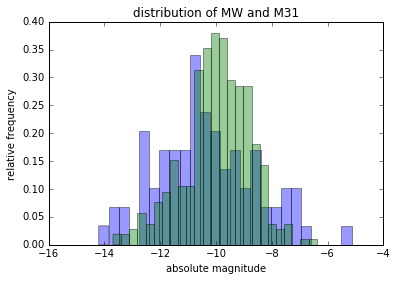

In [10]:
plt.hist(gc_mw,bins=25,alpha=0.4,normed=True,label='MW')
plt.hist(gc_m31,bins=25,alpha=0.4,normed=True,label='M31')
plt.xlabel('absolute magnitude')
plt.ylabel('relative frequency')
plt.title('distribution of MW and M31')
plt.show()

### b)

Because the sample size is bigger than 30, and we can assume that the samples come from a parent gaussian distribution, we can estimate the mean with z-value.
$$confidence\ interval=\bar{x}\pm z(s/\sqrt{N})$$
z value for 99% confidence level is 2.5758<br><br>
We use chi-square value to estimate the population variance with this formula:
$$\frac{(n−1)s^2}{x^2_{\alpha/2}}\leq \sigma^2 \leq \frac{(n−1)s^2}{x^2_{1-\alpha/2}}$$
chi-square for gc_mw(degree of freedom=78)
$$x^2_{\alpha/2}=104.32,x^2_{1-\alpha/2}=55.47$$
chi-square for gc_m31(degree of freedom=359)
$$x^2_{\alpha/2}=413.39,x^2_{1-\alpha/2}=308.4$$

In [11]:
print "gc_mw:mean=%f,variance=%f,size=%d" %(np.mean(gc_mw),np.var(gc_mw,ddof=1),len(gc_mw))
print "gc_m31:mean=%f,variance=%f,size=%d" %(np.mean(gc_m31),np.var(gc_m31,ddof=1),len(gc_m31))
print "confidence interval for mean of gc_mw=[%f,%f]" %(np.mean(gc_mw)-2.5658*np.std(gc_mw,ddof=1)/(len(gc_mw)**1/2),np.mean(gc_mw)+2.5658*np.std(gc_mw,ddof=1)/(len(gc_mw)**1/2))
print "confidence interval for variance of gc_mw=[%f,%f]" %(((len(gc_mw)-1)*(np.std(gc_mw,ddof=1)**2))/104.32,((len(gc_mw)-1)*(np.std(gc_mw,ddof=1)**2))/55.47)
print "confidence interval for mean of gc_m31=[%f,%f]" %(np.mean(gc_m31)-2.5658*np.std(gc_m31,ddof=1)/(len(gc_m31)**1/2),np.mean(gc_m31)+2.5658*np.std(gc_m31,ddof=1)/(len(gc_m31)**1/2))
print "confidence interval for variance of gc_m31=[%f,%f]" %(((len(gc_m31)-1)*(np.std(gc_m31,ddof=1)**2))/413.39,((len(gc_m31)-1)*(np.std(gc_m31,ddof=1)**2))/308.4)


gc_mw:mean=-10.323605,variance=3.252835,size=81
gc_m31:mean=-9.982189,variance=1.427427,size=360
confidence interval for mean of gc_mw=[-10.439294,-10.207915]
confidence interval for variance of gc_mw=[2.494505,4.691307]
confidence interval for mean of gc_m31=[-9.999219,-9.965158]
confidence interval for variance of gc_m31=[1.239619,1.661629]


### c)

### For MW:

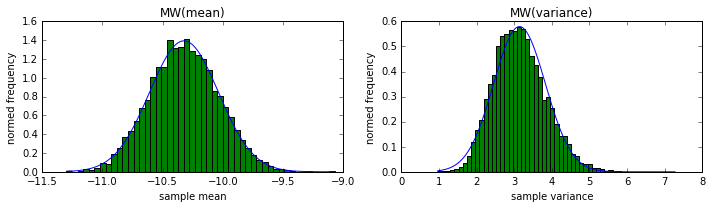

standard deviation for sample mean and variance= 0.286364038699 0.688754645613


In [12]:
#half sample method for MW
mean=[]
var=[]
f,(a1,a2) = plt.subplots(1, 2,figsize=(10,3))
for i in range(10000):
    half=np.random.choice(gc_mw,len(gc_mw)/2)
    mean.append(np.mean(half))
    var.append(np.var(half))

x=np.linspace(np.min(mean),np.max(mean),10000)
half_mean=np.mean(mean)
half_var=np.var(mean,ddof=1)
half_std=np.std(mean,ddof=1)
norm=stats.norm.pdf(x,half_mean,half_std)
a1.plot(x,norm)
a1.hist(mean,bins='scott',normed=True)
a1.set_title('MW(mean)')
a1.set_xlabel('sample mean')
a1.set_ylabel('normed frequency')

x=np.linspace(np.min(var),np.max(var),10000)
half_var_mean=np.mean(var)
half_var_var=np.var(var,ddof=1)
half_var_std=np.std(var,ddof=1)
norm=stats.norm.pdf(x,half_var_mean,half_var_std)
a2.plot(x,norm)
a2.hist(var,bins='scott',normed=True)
a2.set_title('MW(variance)')
a2.set_xlabel('sample variance')
a2.set_ylabel('normed frequency')
plt.tight_layout() 
plt.show()

print "standard deviation for sample mean and variance=", half_std, half_var_std


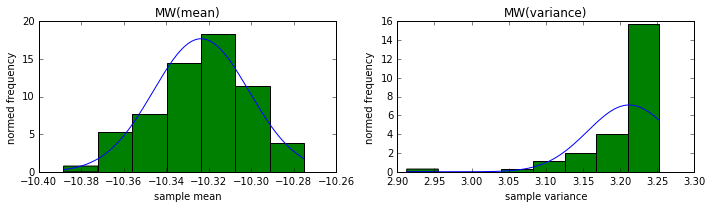

standard deviation for sample mean and variance= 0.0225445208559 0.0561190448152


In [13]:
#jackknife for MW
f,(a1,a2) = plt.subplots(1, 2,figsize=(10,3))

jack_mean=jackknife(gc_mw,np.mean,kwargs=dict(axis=1),return_raw_distribution=True)[2]
jack_mean_mean=np.mean(jack_mean)
jack_mean_var=np.var(jack_mean,ddof=1)
jack_mean_std=np.std(jack_mean,ddof=1)
xnorm=np.linspace(jack_mean.min(),jack_mean.max(),10000)
jpdf=stats.norm.pdf(xnorm,jack_mean_mean,jack_mean_std)
a1.plot(xnorm,jpdf,color='blue')
a1.hist(jack_mean,bins='scott',normed=True,color='green')
a1.set_title('MW(mean)')
a1.set_xlabel('sample mean')
a1.set_ylabel('normed frequency')

jack_var=jackknife(gc_mw,np.var,kwargs=dict(axis=1),return_raw_distribution=True)[2]
jack_var_mean=np.mean(jack_var)
jack_var_var=np.var(jack_var,ddof=1)
jack_var_std=np.std(jack_var,ddof=1)
xnorm=np.linspace(jack_var.min(),jack_var.max(),10000)
jpdf=stats.norm.pdf(xnorm,jack_var_mean,jack_var_std)
a2.plot(xnorm,jpdf,color='blue')
a2.hist(jack_var,bins='scott',normed=True,color='green')
a2.set_title('MW(variance)')
a2.set_xlabel('sample variance')
a2.set_ylabel('normed frequency')
plt.tight_layout() 
plt.show()

print "standard deviation for sample mean and variance=", jack_mean_std, jack_var_std


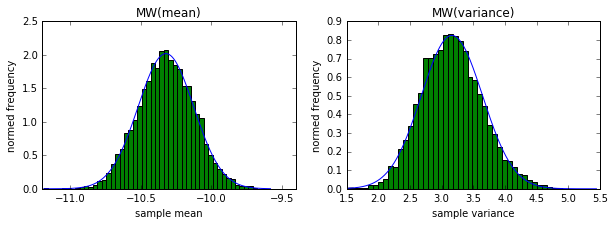

standard deviation for sample mean and variance= 0.197580585032 0.483826166475


In [14]:
#bootstrap for MW
f,(a1,a2) = plt.subplots(1, 2,figsize=(10,3))

boot_mean=bootstrap(gc_mw,10000,np.mean,kwargs=dict(axis=1))
boot_mean_mean=np.mean(boot_mean)
boot_mean_var=np.var(boot_mean,ddof=1)
boot_mean_std=np.std(boot_mean,ddof=1)
xnorm=np.linspace(boot_mean.min(),boot_mean.max(),10000)
bpdf=stats.norm.pdf(xnorm,boot_mean_mean,boot_mean_std)
a1.plot(xnorm,bpdf,color='blue')
a1.hist(boot_mean,bins='scott',normed=True,color='green')
a1.set_title('MW(mean)')
a1.set_xlabel('sample mean')
a1.set_ylabel('normed frequency')

boot_var=bootstrap(gc_mw,10000,np.var,kwargs=dict(axis=1))
boot_var_mean=np.mean(boot_var)
boot_var_var=np.var(boot_var,ddof=1)
boot_var_std=np.std(boot_var,ddof=1)
xnorm=np.linspace(boot_var.min(),boot_var.max(),10000)
bpdf=stats.norm.pdf(xnorm,boot_var_mean,boot_var_std)
a2.plot(xnorm,bpdf,color='blue')
a2.hist(boot_var,bins='scott',normed=True,color='green')
a2.set_title('MW(variance)')
a2.set_xlabel('sample variance')
a2.set_ylabel('normed frequency')
plt.show()
print "standard deviation for sample mean and variance=", boot_mean_std, boot_var_std


In [15]:
print "gc_mw:mean=%f,variance=%f,size=%d" %(np.mean(gc_mw),np.var(gc_mw,ddof=1),len(gc_mw))
print "gc_m31:mean=%f,variance=%f,size=%d" %(np.mean(gc_m31),np.var(gc_m31,ddof=1),len(gc_m31))
print "mean of the mean and the population variance by half sample method=",half_mean,half_var_mean
print "mean of the mean and the population variance by jackknife=",jack_mean_mean,jack_var_mean
print "mean of the mean and the population variance by bootstrap method=",boot_mean_mean,boot_var_mean

print "standard deviation in the mean and the population variance by half sample method=",half_std,half_var_std
print "standard deviation in the mean and the population variance by jackknife=",jack_mean_std,jack_var_std
print "standard deviation in the mean and the population variance by bootstrap method=",boot_mean_std,boot_var_std

gc_mw:mean=-10.323605,variance=3.252835,size=81
gc_m31:mean=-9.982189,variance=1.427427,size=360
mean of the mean and the population variance by half sample method= -10.3227291625 3.14011787433
mean of the mean and the population variance by jackknife= -10.3236049383 3.21217425833
mean of the mean and the population variance by bootstrap method= -10.3221158185 3.16152808385
standard deviation in the mean and the population variance by half sample method= 0.286364038699 0.688754645613
standard deviation in the mean and the population variance by jackknife= 0.0225445208559 0.0561190448152
standard deviation in the mean and the population variance by bootstrap method= 0.197580585032 0.483826166475


If we compare the plot of those tests, we can see that most of the results fit gaussian distribution(except variance estimated by jackknife method.) Also, the standard deviation in the mean and variance shows that jackknife returns a more certain value than bootstrapping, and bootstrapping returns a more certain value than half sample method. We can then compare the mean and variance estimated by the three methods to our sample mean and variance to estimate the precision of our sample statistics.

### For M31:

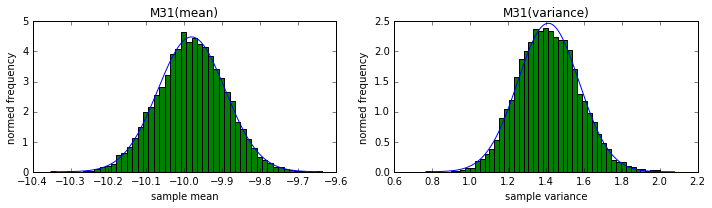

standard deviation for sample mean and variance= 0.0889649225042 0.161575915348


In [16]:
#half sample method for M31
mean=[]
var=[]
f,(a1,a2) = plt.subplots(1, 2,figsize=(10,3))
for i in range(10000):
    half=np.random.choice(gc_m31,len(gc_m31)/2)
    mean.append(np.mean(half))
    var.append(np.var(half))

x=np.linspace(np.min(mean),np.max(mean),10000)
half_mean=np.mean(mean)
half_var=np.var(mean,ddof=1)
half_std=np.std(mean,ddof=1)
norm=stats.norm.pdf(x,half_mean,half_std)
a1.plot(x,norm)
a1.hist(mean,bins='scott',normed=True)
a1.set_title('M31(mean)')
a1.set_xlabel('sample mean')
a1.set_ylabel('normed frequency')

x=np.linspace(np.min(var),np.max(var),10000)
half_var_mean=np.mean(var)
half_var_var=np.var(var,ddof=1)
half_var_std=np.std(var,ddof=1)
norm=stats.norm.pdf(x,half_var_mean,half_var_std)
a2.plot(x,norm)
a2.hist(var,bins='scott',normed=True)
a2.set_title('M31(variance)')
a2.set_xlabel('sample variance')
a2.set_ylabel('normed frequency')
plt.tight_layout() 
plt.show()

print "standard deviation for sample mean and variance=", half_std, half_var_std


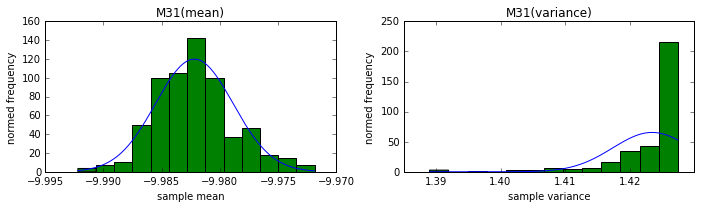

standard deviation for sample mean and variance= 0.00332799374128 0.00609650665633


In [17]:
#jackknife for M31
f,(a1,a2) = plt.subplots(1, 2,figsize=(10,3))

jack_mean=jackknife(gc_m31,np.mean,kwargs=dict(axis=1),return_raw_distribution=True)[2]
jack_mean_mean=np.mean(jack_mean)
jack_mean_var=np.var(jack_mean,ddof=1)
jack_mean_std=np.std(jack_mean,ddof=1)
xnorm=np.linspace(jack_mean.min(),jack_mean.max(),10000)
jpdf=stats.norm.pdf(xnorm,jack_mean_mean,jack_mean_std)
a1.plot(xnorm,jpdf,color='blue')
a1.hist(jack_mean,bins='scott',normed=True,color='green')
a1.set_title('M31(mean)')
a1.set_xlabel('sample mean')
a1.set_ylabel('normed frequency')

jack_var=jackknife(gc_m31,np.var,kwargs=dict(axis=1),return_raw_distribution=True)[2]
jack_var_mean=np.mean(jack_var)
jack_var_var=np.var(jack_var,ddof=1)
jack_var_std=np.std(jack_var,ddof=1)
xnorm=np.linspace(jack_var.min(),jack_var.max(),10000)
jpdf=stats.norm.pdf(xnorm,jack_var_mean,jack_var_std)
a2.plot(xnorm,jpdf,color='blue')
a2.hist(jack_var,bins='scott',normed=True,color='green')
a2.set_title('M31(variance)')
a2.set_xlabel('sample variance')
a2.set_ylabel('normed frequency')
plt.tight_layout() 
plt.show()

print "standard deviation for sample mean and variance=", jack_mean_std, jack_var_std


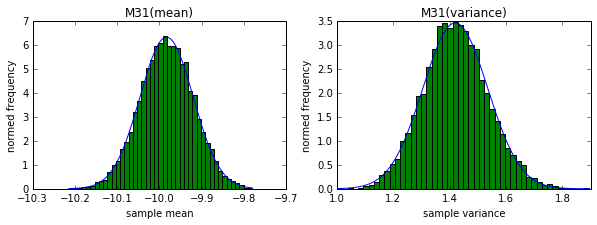

standard deviation for sample mean and variance= 0.0629322769795 0.115077755029


In [18]:
#bootstrap for M31
f,(a1,a2) = plt.subplots(1, 2,figsize=(10,3))

boot_mean=bootstrap(gc_m31,10000,np.mean,kwargs=dict(axis=1))
boot_mean_mean=np.mean(boot_mean)
boot_mean_var=np.var(boot_mean,ddof=1)
boot_mean_std=np.std(boot_mean,ddof=1)
xnorm=np.linspace(boot_mean.min(),boot_mean.max(),10000)
bpdf=stats.norm.pdf(xnorm,boot_mean_mean,boot_mean_std)
a1.plot(xnorm,bpdf,color='blue')
a1.hist(boot_mean,bins='scott',normed=True,color='green')
a1.set_title('M31(mean)')
a1.set_xlabel('sample mean')
a1.set_ylabel('normed frequency')

boot_var=bootstrap(gc_m31,10000,np.var,kwargs=dict(axis=1))
boot_var_mean=np.mean(boot_var)
boot_var_var=np.var(boot_var,ddof=1)
boot_var_std=np.std(boot_var,ddof=1)
xnorm=np.linspace(boot_var.min(),boot_var.max(),10000)
bpdf=stats.norm.pdf(xnorm,boot_var_mean,boot_var_std)
a2.plot(xnorm,bpdf,color='blue')
a2.hist(boot_var,bins='scott',normed=True,color='green')
a2.set_title('M31(variance)')
a2.set_xlabel('sample variance')
a2.set_ylabel('normed frequency')
plt.show()
print "standard deviation for sample mean and variance=", boot_mean_std, boot_var_std


In [19]:
print "gc_m31:mean=%f,variance=%f,size=%d" %(np.mean(gc_m31),np.var(gc_m31,ddof=1),len(gc_m31))
print "mean of the mean and the population variance by half sample method=",half_mean,half_var_mean
print "mean of the mean and the population variance by jackknife=",jack_mean_mean,jack_var_mean
print "mean of the mean and the population variance by bootstrap method=",boot_mean_mean,boot_var_mean

print "standard deviation in the mean and the population variance by half sample method=",half_std,half_var_std
print "standard deviation in the mean and the population variance by jackknife=",jack_mean_std,jack_var_std
print "standard deviation in the mean and the population variance by bootstrap method=",boot_mean_std,boot_var_std

gc_m31:mean=-9.982189,variance=1.427427,size=360
mean of the mean and the population variance by half sample method= -9.98106793278 1.41318352737
mean of the mean and the population variance by jackknife= -9.98218888889 1.42345085288
mean of the mean and the population variance by bootstrap method= -9.98304987167 1.41988533417
standard deviation in the mean and the population variance by half sample method= 0.0889649225042 0.161575915348
standard deviation in the mean and the population variance by jackknife= 0.00332799374128 0.00609650665633
standard deviation in the mean and the population variance by bootstrap method= 0.0629322769795 0.115077755029


If we compare the plot of those tests, we can see that most of the results fit gaussian distribution(except variance estimated by jackknife method.) Again, the standard deviation in the mean and variance shows that jackknife returns a more certain value than bootstrapping, and bootstrapping returns a more certain value than half sample method. We can then compare the mean and variance estimated by the three methods to our sample mean and variance to estimate the precision of our sample statistics.

## d)

In [20]:
print "---Results for gc_mw:"
anderson,crit,sig=stats.anderson(gc_mw,'norm')
shapiro,shapiro_p=stats.shapiro(gc_mw)
print "anderson darling test:",anderson, crit, sig
print "anderson statistic=%f,critical value=%f, with 99%% confidence level" %(anderson,crit[4])
print "shapiro test:",shapiro,"p-value:",shapiro_p
print "gc_mw has a gaussion distribution"
print ''

print "---Results for gc_m31:"
anderson,crit,sig=stats.anderson(gc_m31,'norm')
shapiro,shapiro_p=stats.shapiro(gc_m31)
print "anderson darling test:",anderson, crit, sig
print "anderson statistic=%f, critical value=%f, with 99%% confidence level" %(anderson,crit[4])
print "shapiro test:",shapiro,"p-value:",shapiro_p
print "gc_m31 does not have a gaussion distribution"


---Results for gc_mw:
anderson darling test: 0.302573259761 [ 0.551  0.627  0.753  0.878  1.044] [ 15.   10.    5.    2.5   1. ]
anderson statistic=0.302573,critical value=1.044000, with 99% confidence level
shapiro test: 0.988274991512 p-value: 0.675004720688
gc_mw has a gaussion distribution

---Results for gc_m31:
anderson darling test: 1.79394480918 [ 0.57   0.649  0.779  0.908  1.08 ] [ 15.   10.    5.    2.5   1. ]
anderson statistic=1.793945, critical value=1.080000, with 99% confidence level
shapiro test: 0.985311210155 p-value: 0.00101696059573
gc_m31 does not have a gaussion distribution


## Problem 3

Sometimes there are some outliners that might significantly affect the value of mean and standard deviation. By using the z statistics defined in the book, we can get a more robust statistic by using the quartile numbers, which are less affected by the outliners.
$$Z_1=1.3\frac{\left|\mu-q_{50}\right|}{s}\sqrt{N}$$

$$Z_2=1.1\left|\frac{s}{\sigma_G}-1\right|\sqrt{N}$$



In [21]:
z1=1.3*(abs(np.mean(gc_mw)-np.percentile(gc_mw,50))/np.std(gc_mw,ddof=1))*math.sqrt(len(gc_mw))
z2=1.1*abs(np.std(gc_mw,ddof=1)/stats2.sigmaG(gc_mw)-1)*math.sqrt(len(gc_mw))
print "z1 and z2 of MW",z1,z2
z1=1.3*(abs(np.mean(gc_m31)-np.percentile(gc_m31,50))/np.std(gc_m31,ddof=1))*math.sqrt(len(gc_m31))
z2=1.1*abs(np.std(gc_m31,ddof=1)/stats2.sigmaG(gc_m31)-1)*math.sqrt(len(gc_m31))
print "z1 and z2 of MW",z1,z2

z1 and z2 of MW 1.51407199984 0.668837390412
z1 and z2 of MW 1.68647785228 1.89559723031


Because the sample size of MW is smaller than 100, we cannot use the z-statistics. This also explains the inconsistency between z1 and z2 of MW. We can use the z statistics for M31 becuase the sample size is greater than 100. From the z statistics of M31, we can see that it indicates a depature from the gaussian distribution. This is consistent with the results we have in question 2.

## Problem 4

In [22]:
# cat radio_pointings.dat

In [23]:
spec = np.genfromtxt('radio_pointings.dat',skip_header=2,skip_footer=(73-42))
add=np.genfromtxt('radio_pointings.dat',skip_header=40,skip_footer=(73-43))
spec=spec.flatten()
spec=np.append(spec,add)
randspec = np.genfromtxt('radio_pointings.dat',skip_header=44)
randspec=randspec.flatten()

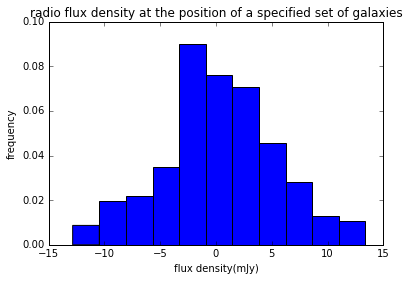

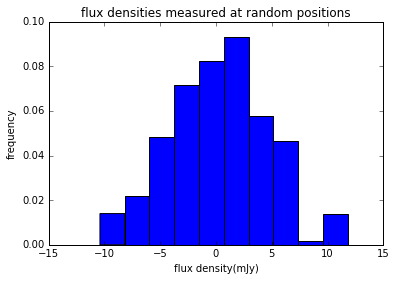

In [24]:
plt.hist(spec,bins='scott',normed=True)
plt.title('radio flux density at the position of a specified set of galaxies')
plt.xlabel('flux density(mJy)')
plt.ylabel('frequency')
plt.show()

plt.hist(randspec,bins='scott',normed=True)
plt.title('flux densities measured at random positions')
plt.xlabel('flux density(mJy)')
plt.ylabel('frequency')
plt.show()

In [25]:
print stats.ks_2samp(spec, randspec)

Ks_2sampResult(statistic=0.067411113096301656, pvalue=0.42652020388716194)


If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same. So, we predict that the distributions of the two samples are the same.

In [26]:
print "mean of spec=%f, standard deviation of spec=%f"%(np.mean(spec),np.std(spec))
print "mean of randspec=%f, standard deviation of randspec=%f"%(np.mean(randspec),np.std(randspec))

mean of spec=0.419433, standard deviation of spec=5.090484
mean of randspec=0.291421, standard deviation of randspec=4.377494


The mean and standard deviation of the two samples are similar.Based on the KS two sample test, and comparing the mean and standard deviation of the two samples, we can say that there is a high chance that there is no statistically significant measurement of radio emission excesses towards the galaxy positions.